In [1]:
import pandas as pd
import numpy as np
import re # pattern matching

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)

In [2]:
# load the dataset
df = pd.read_csv('Clean_data.csv',index_col='Unnamed: 0')
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
0,Residential Plot,Maheshwaram,45.00,1111,4050,New,4.6
1,Residential Plot,Kondakal,34.00,2361,1440,New,3.7
2,Residential Plot,Bibinagar,14.19,944,1503,New,4.9
3,Residential Plot,Gachibowli,330.00,3333,9900,New,0.0
4,Residential Plot,Shadnagar,6.72,466,1440,New,4.7


# 1. Clients Information

## 1.1. Client's specified Price range 25 - 40L

In [4]:
d = df[(df['price(L)']>=25.0) & (df['price(L)']<=40)]
d.head()

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
1,Residential Plot,Kondakal,34.00,2361,1440,New,3.7
12,Residential Plot,Shadnagar,29.38,611,4810,New,0.0
17,Residential Plot,Kadthal,36.00,500,7200,New,4.2
21,Residential Plot,Shadnagar,34.99,1111,3150,New,0.0
32,Residential Plot,Mangalpally,31.15,1944,1602,New,4.3


## 1.2. Client required location - Gachibowli, Miyapur, Kukatpally

In [5]:
d1=d[(d['location']=='Gachibowli')|(d['location']=='Miyapur')|(d['location']=='Kukatpally')]
d1.shape

(85, 7)

## 1.3. Client requires only Apartments

In [6]:
d1.set_index(keys='title',inplace=True)
d1.head()

,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
title,,,,,,
2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
Residential Plot,Gachibowli,40.0,2222,1800,New,3.6
2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0


In [113]:
d3 = d1.filter(like='Apartment', axis=0)
print('shape',d3.shape)
d3.head()

shape (69, 6)


,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
title,,,,,,
2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0
2 BHK Apartment,Miyapur,29.0,2412,1202,Under Construction,0.0


In [16]:
data = d3.reset_index()
data.head()


,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
0,2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
1,2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
2,3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
3,2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0
4,2 BHK Apartment,Miyapur,29.0,2412,1202,Under Construction,0.0


## 1.4. Client's required area in sqft

In [114]:
data = data[data['area_insqft']>=1000]
data.shape

(48, 7)

# 2. Describe the Statistics of required data

In [84]:
data.describe()

,price(L),rate_persqft,area_insqft,agent_rating
count,48.000000,48.000000,48.000000,48.00000
mean,34.396042,3083.166667,1132.583333,3.01250
std,4.666956,537.305505,164.054847,2.10578
min,25.000000,2055.000000,1000.000000,0.00000
25%,31.530000,2484.750000,1010.750000,0.00000
50%,35.100000,3326.000000,1090.000000,4.30000
75%,37.975000,3500.000000,1200.500000,4.62500
max,40.000000,3846.000000,1640.000000,5.00000


# 3. Univariate analysis

## 3.1. Title and Location

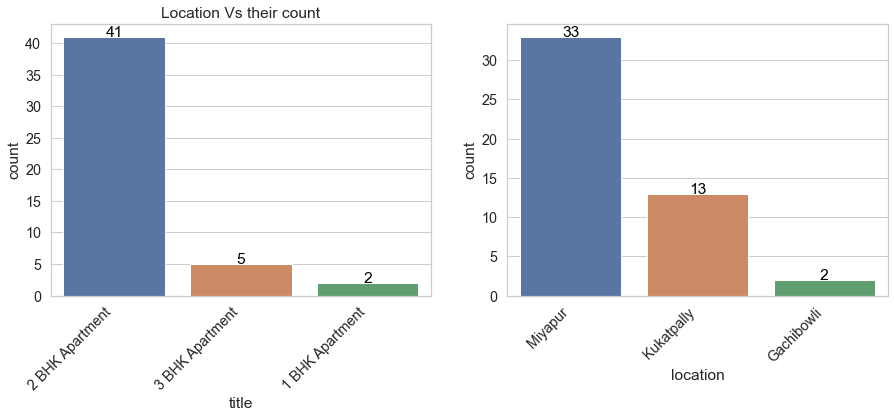

In [85]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

temp = data['title'].value_counts().reset_index()
temp.columns = ['title', 'count']


fig = sns.barplot(y='count',x='title', data=temp, ax = axes[0])
axes[0].set_title('Types of Property Available Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
for index, row in temp.iterrows():
    fig.text(row.name,row['count'], row['count'], color='black', ha="center")
    

temp = data['location'].value_counts().reset_index()
temp.columns = ['location', 'count']


fig = sns.barplot(y='count',x='location', data=temp, ax=axes[1])
axes[0].set_title('Location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
for index, row in temp.iterrows():
    fig.text(row.name,row['count'], row['count'], color='black', ha="center");
    

1. We can see that there are more 2 BHK followed by 3BHK apartments in price range 20-40 lakh and given clients area 
2. Also, there are more number of Property available in Miyapur and Kukatpally

## 3.2.  price

Text(0.5, 1.0, 'Price boxplot ')

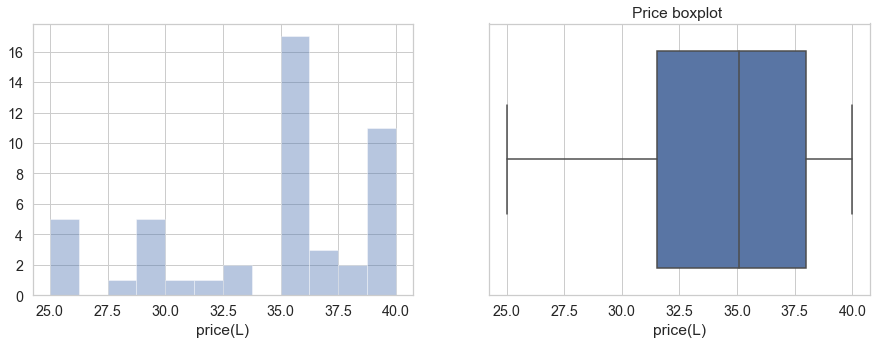

In [86]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.distplot(data['price(L)'],bins=12,kde=False,ax=axes[0])
plt.title('price(L) histogram')


sns.boxplot(data['price(L)'], ax=axes[1])
plt.title('Price boxplot ')



* from histogram we can see that there are more number of property within price range 35-36.35 Lakhs and 38.25-40 Lakhs


# 3.3. rate_persqft

Text(0.5, 1.0, 'rate_persqft boxplot ')

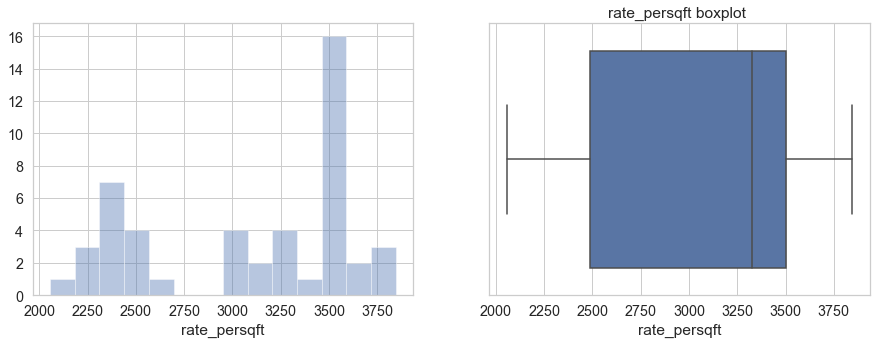

In [103]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.distplot(data['rate_persqft'],bins=14,kde=False,ax=axes[0])
plt.title('rate_persqft histogram')


sns.boxplot(data['rate_persqft'], ax=axes[1])
plt.title('rate_persqft boxplot ')

There are almost 17 of plots with 3500 - 3700, and almost 9 plots in range 2250-2500 rate per squarefoot

# 3.4. area_insqft

Text(0.5, 1.0, 'area_insqft boxplot ')

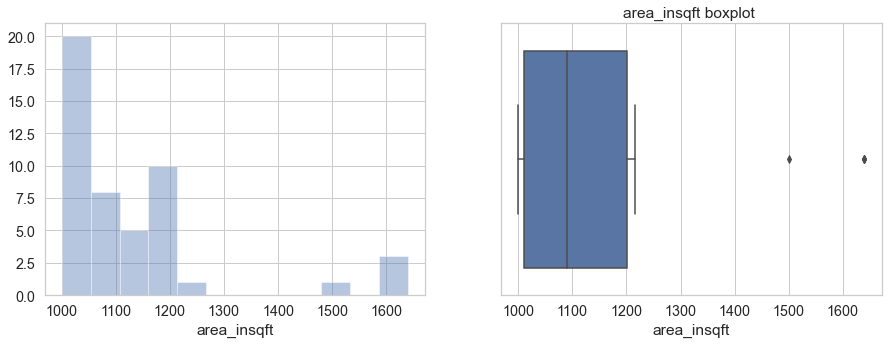

In [106]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.distplot(data['area_insqft'],bins=12,kde=False,ax=axes[0])
plt.title('area_insqft histogram')


sns.boxplot(data['area_insqft'], ax=axes[1])
plt.title('area_insqft boxplot ')

there are more number of Properties with area of 1000 - 1200 squarefeet

## 3.5 building_status

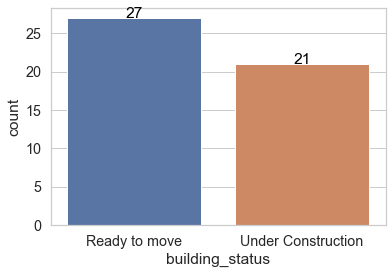

In [129]:
temp = data['building_status'].value_counts().reset_index()
temp.columns = ['building_status', 'count']


fig = sns.barplot(y='count',x='building_status', data=temp)
axes[0].set_title('building_status Vs their count')
for index, row in temp.iterrows():
    fig.text(row.name,row['count'], row['count'], color='black', ha="center");
    

we can see that almost 27 properties are ready to move and 21 are under construction

# 4. Bivariate Analysis

## 4.1. Title vs Price

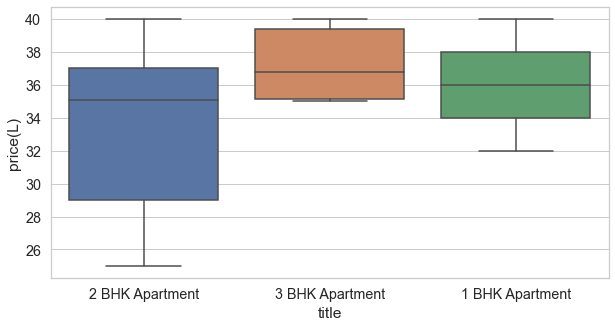

In [125]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(y='price(L)',x='title',data=data,ax=ax)
plt.show()

from figure we can see that 
* there are more 2 Bhk apartments in the range 29-35Lakh
* there are more 3 Bhk apartments in the range 27-39Lakh
* there are more 2 Bhk apartments in the range 24-38Lakh


## 4.2 Location Vs Price 

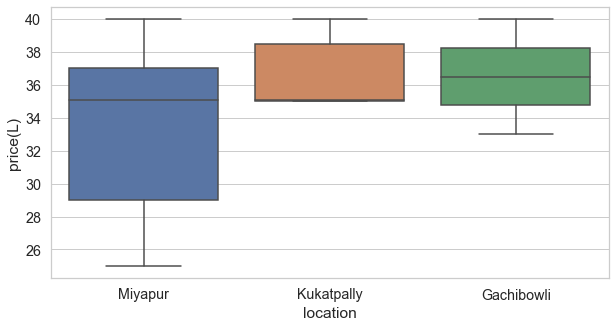

In [124]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(y='price(L)',x='location',data=data,ax=ax)
plt.show() 

we can see that
* Miyapur has more properties in price range of 29-37Lakh
* Kukatpally has more properties in price range of 35-39 Lakh
* Gachibowli has more properties in price range of 35-38.1Lakh
* above all the Price range in Miyapur is lower comared to other cities. 

## 4.3. Building_status Vs Price

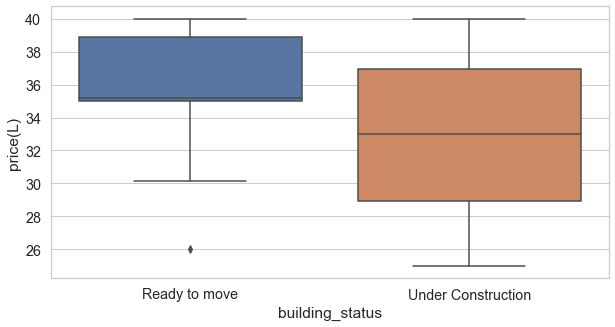

In [126]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(y='price(L)',x='building_status',data=data,ax=ax)
plt.show() 

with the given specification,
* Ready to move Properties have higher cost compared to Under Construction
* Ready to move properties price range is 35-39 Lakhs
* under-construction properties have price range 29-37 lakh.

# 5. Multivariate Analysis 

## 5.1. Location vs Price for title

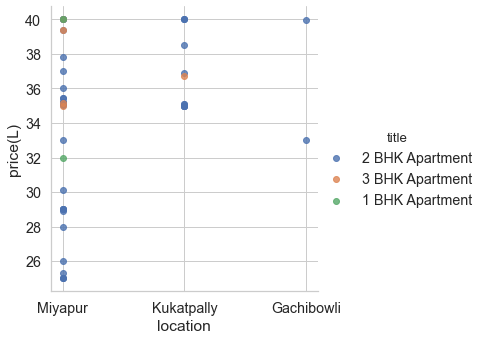

In [145]:
sns.lmplot(x='location', y='price(L)', hue='title',data=data, fit_reg=False)


1. there are more 2BHK flats in Miyapur compared to other cities.
2. 1BHK apartments are available only in Miyapur.

## 5.2. Location vs Price for building status

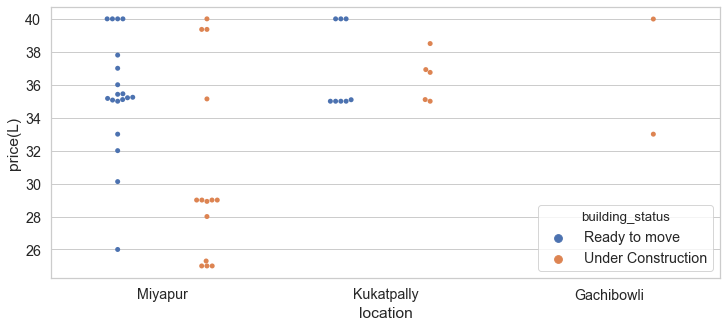

In [156]:
fig, axes = plt.subplots(figsize=(12,5))
sns.swarmplot(y='price(L)', x='location', hue='building_status',data=data, split=True )

* Miyapur has Buildings which are Ready to move with price range 30-30 lakh.
* Buildings in Kukatpally have more number of builinding under construction with price range 34-40 lakhs.
* Gachibowli has all the buildings which are under contruction but the price range is still high there compared to other tow cities

## 5.3. Price Vs area_sqft for location

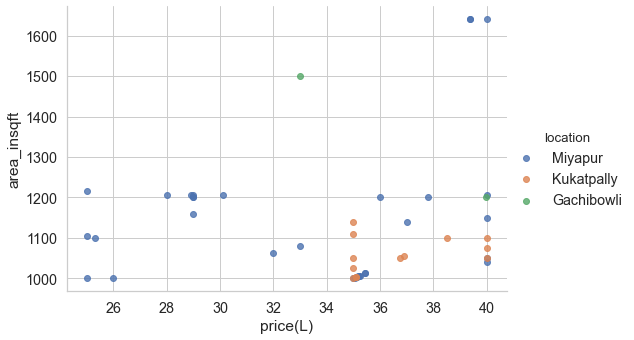

In [163]:
sns.lmplot(x="price(L)", y="area_insqft", hue="location", 
           data=data,fit_reg=False, aspect=1.5)

* Miyapur has plots with 1000-1220 square feet covering price range 20-40L
* Kukatpally also has plots with 1000-1220 square feet covering price range 35-40L
* gachibowli has very only 2 Plots

## 5.4. Price Vs area_sqft for title

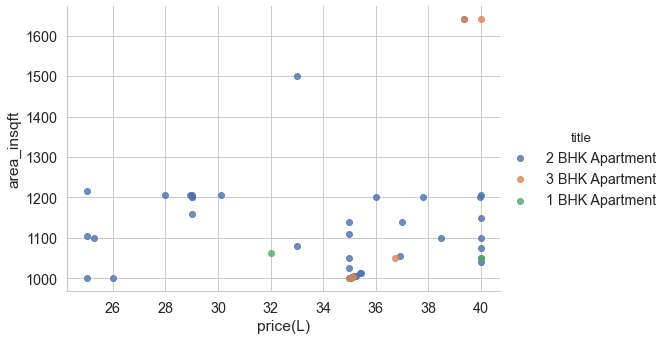

In [164]:
sns.lmplot(x="price(L)", y="area_insqft", hue="title", 
           data=data,fit_reg=False, aspect=1.5)

1. More no of 2 BHK Apartments are having 1000 to 1200 area in sqft

## 5.5.Price Vs area_sqft for building_status

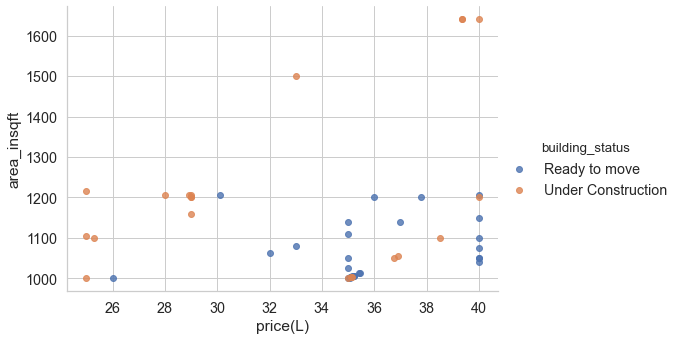

In [171]:
sns.lmplot(x="price(L)", y="area_insqft", hue="building_status", 
           data=data,fit_reg=False, aspect=1.5)

All the plots with 1000 - 1200 sqft area have higher price for Ready to move properties and lower price for under construction properties

## 5.5.Area_insqft vs rate_persqft for location

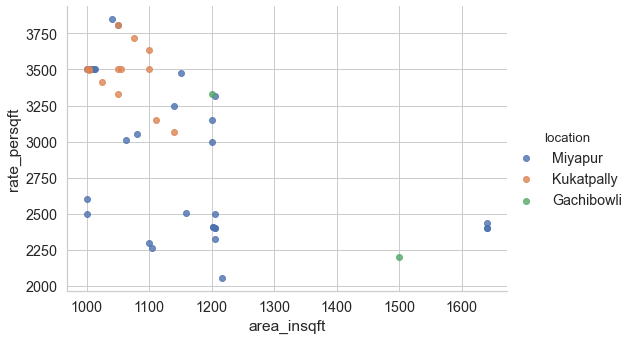

In [170]:
sns.lmplot(x='area_insqft', y='rate_persqft', hue = 'location',
           data=data, fit_reg=False,aspect=1.5 );

* Miyapur has highest number of plots with 1000-1200 area and 2000-3750 rate per square foot.
* Kukatpally has plots with 1000-1200 area and 3000-3750 rate per square foot.


# Findings from Analysis for Client


1. Miyapur has 33 properties 
    * It has properties with 1000 - 1200 square feet area.
    * Price for New properties covers the range 20-40 lakh.
    * Price for under construction properties covers the range 26-30 lakh.
    * it has highest number of 2BHK plots and 2 3BHK and 1BHK plots.
    * rate per square foot is in range 2000-3750. 
2. Kukatpally has 13 properties 
    * It has properties with 1000 - 1500 square feet area.
    * Price for New properties covers the range 35-40 lakh.
    * Price for under construction properties covers the range 38-40 lakh.
    * it has higher number of 2BHK plots and 1 3BHK plots.
    * rate per square foot is in range 3000-3750.
3. Gachibowli has only 2 Properties 
    * both has cost of 40 lakh, under construction
    * the area in square foot for these plots is 1200 and 1500 respectively.